In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_excel('../data/gsw_box_score_team_stats.xlsx')

gsw_df = df[df['TEAM']=='GSW']
opponent_df = df[df['TEAM']!='GSW']

print(f'gsw_df.shape: {gsw_df.shape}\t\tgsw_df.TEAM.nunique(): {gsw_df.TEAM.nunique()}')
print(f'opponent_df.shape: {opponent_df.shape}\topponent_df.TEAM.nunique(): {opponent_df.TEAM.nunique()}')

gsw_df.shape: (80, 30)		gsw_df.TEAM.nunique(): 1
opponent_df.shape: (80, 30)	opponent_df.TEAM.nunique(): 29


In [3]:
JIMMY_TRADE = '2025-02-08'

gsw_df_pre_jimmy = gsw_df[gsw_df['DATE'] < JIMMY_TRADE]
gsw_df_with_jimmy = gsw_df[gsw_df['DATE'] >= JIMMY_TRADE]

opp_df_pre_jimmy = opponent_df[opponent_df['DATE'] < JIMMY_TRADE]
opp_df_with_jimmy = opponent_df[opponent_df['DATE'] >= JIMMY_TRADE]

In [4]:
gsw_pts_avg_with_jimmy = round(gsw_df_with_jimmy.PTS.mean(), 2)
gsw_pts_avg_pre_jimmy = round(gsw_df_pre_jimmy.PTS.mean(), 2)
print(f"GSW PTS AVG with Jimmy: {gsw_pts_avg_with_jimmy}; GSW PTS AVG before Jimmy: {gsw_pts_avg_pre_jimmy}")

opp_pts_avg_with_jimmy = round(opp_df_with_jimmy.PTS.mean(), 2)
opp_pts_avg_pre_jimmy = round(opp_df_pre_jimmy.PTS.mean(), 2)
print(f"Opponents PTS AVG with Jimmy: {opp_pts_avg_with_jimmy}; Opponents PTS AVG before Jimmy: {opp_pts_avg_pre_jimmy}")

GSW PTS AVG with Jimmy: 118.0; GSW PTS AVG before Jimmy: 111.51
Opponents PTS AVG with Jimmy: 108.34; Opponents PTS AVG before Jimmy: 111.92


In [5]:
avg_columns = [
    'FGM', 'FGA','3PM', '3PA', 'FTM', 'FTA', 'OREB', 'DREB',
    'TREB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', '+/-']

gsw_df_pre_jimmy_avg = pd.DataFrame(gsw_df_pre_jimmy[avg_columns].mean()).transpose()
gsw_df_with_jimmy_avg = pd.DataFrame(gsw_df_with_jimmy[avg_columns].mean()).transpose()

In [6]:
gsw_avg_combined_df = pd.concat([gsw_df_pre_jimmy_avg, gsw_df_with_jimmy_avg], axis=0)
gsw_avg_combined_df

,FGM,FGA,3PM,3PA,FTM,FTA,OREB,DREB,TREB,AST,STL,BLK,TOV,PF,PTS,+/-
0,40.705882,91.627451,15.411765,42.549020,14.686275,20.392157,12.607843,33.392157,46.0,28.607843,8.607843,4.980392,13.254902,19.568627,111.509804,-0.411765
0,41.034483,88.862069,15.482759,42.344828,20.448276,24.827586,12.965517,32.034483,45.0,30.000000,10.551724,4.275862,13.000000,18.413793,118.000000,9.655172


In [7]:
opp_df_pre_jimmy_avg = pd.DataFrame(opp_df_pre_jimmy[avg_columns].mean()).transpose()
opp_df_with_jimmy_avg = pd.DataFrame(opp_df_with_jimmy[avg_columns].mean()).transpose()

opp_avg_combined_df = pd.concat([opp_df_pre_jimmy_avg, opp_df_with_jimmy_avg], axis=0)
opp_avg_combined_df['Descr']=['before','after']

In [8]:
opp_avg_combined_df


,FGM,FGA,3PM,3PA,FTM,FTA,OREB,DREB,TREB,AST,STL,BLK,TOV,PF,PTS,+/-,Descr
0,40.803922,88.215686,13.352941,37.352941,16.960784,21.784314,10.549020,34.647059,45.196078,26.549020,7.549020,5.862745,13.725490,17.784314,111.921569,0.411765,before
0,39.827586,84.689655,13.068966,34.862069,15.620690,20.724138,10.655172,31.206897,41.862069,24.724138,7.448276,4.620690,16.758621,19.827586,108.344828,-9.655172,after


<Axes: xlabel='DATE'>

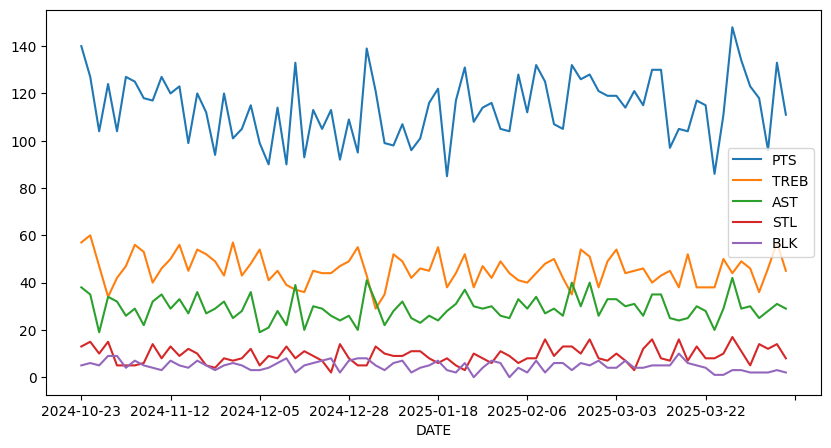

In [9]:
import numpy as np

# ts = pd.DataFrame(gsw_df_pre_jimmy.PTS, index=gsw_df_pre_jimmy.DATE)
# ts
ts = gsw_df#.cumsum()
ts.plot(y=['PTS','TREB', 'AST', 'STL', 'BLK'], x='DATE', kind='line', figsize=(10,5))

In [10]:
gsw_df[gsw_df['DATE'] >= JIMMY_TRADE].tail(10)

,Unnamed: 0,TEAM,OPP,STATUS,DATE,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,TREB,AST,STL,BLK,TOV,PF,PTS,+/-,Q1,Q2,Q3,Q4,W/L
140,140,GSW,ATL,away,2025-03-22,240:00,39,84,0.464,16,38,0.421,21,26,0.808,6,32,38,28,8,4,9,16,115,-9,23,34,24,34,L
142,142,GSW,MIA,away,2025-03-25,240:00,33,83,0.398,9,38,0.237,11,16,0.688,14,24,38,20,8,1,12,14,86,-26,22,18,30,16,L
144,144,GSW,NOP,away,2025-03-28,240:00,38,92,0.413,13,55,0.236,22,29,0.759,18,32,50,29,10,1,10,22,111,16,21,29,33,28,W
146,146,GSW,SAS,away,2025-03-30,240:00,56,97,0.577,21,44,0.477,15,19,0.789,10,34,44,42,17,3,12,15,148,42,44,24,43,37,W
148,148,GSW,MEM,away,2025-04-01,240:00,42,99,0.424,22,56,0.393,28,28,1.000,15,34,49,29,11,3,11,22,134,9,45,29,29,31,W
150,150,GSW,LAL,away,2025-04-03,240:00,39,82,0.476,19,42,0.452,26,31,0.839,14,32,46,30,5,2,13,21,123,7,26,34,28,35,W
153,153,GSW,DEN,home,2025-04-04,240:00,43,88,0.489,16,38,0.421,16,18,0.889,11,25,36,25,14,2,13,15,118,14,34,32,30,22,W
155,155,GSW,HOU,home,2025-04-06,240:00,37,89,0.416,16,43,0.372,6,11,0.545,15,31,46,28,12,2,20,14,96,-10,24,26,26,20,L
156,156,GSW,PHX,away,2025-04-08,240:00,45,93,0.484,15,40,0.375,28,34,0.824,19,38,57,31,14,3,15,10,133,38,37,32,26,38,W
159,159,GSW,SAS,home,2025-04-09,240:00,36,86,0.419,16,48,0.333,23,28,0.821,16,29,45,29,8,2,10,19,111,-3,32,19,37,23,L


In [11]:
def get_best_or_worst_gsw_stat(stat: str, lowest: bool, other_columns: list, n: int=5):
    filtered_games = gsw_df.sort_values(by=stat, ascending=lowest).head(n)
    print(f"\nGSW's average {stat} per game this season: {round(gsw_df[stat].mean(),2)}")
    print(f"GSW's average {stat} based on this {n}-game sample: {filtered_games[stat].mean()}")
    print(filtered_games[['TEAM', 'OPP', 'DATE', 'STATUS', stat] + other_columns].sort_values(stat, ascending=lowest))
    return filtered_games

# opponent_df[opponent_df['DATE'].isin(gsw_worst_3pm_games_dates)].sort_values()
# gsw_df[gsw_df['DATE'].isin(gsw_worst_3pm_games_dates)][['TEAM', 'OPP', 'DATE', 'STATUS', '3PM']].sort_values('3PM', ascending=True)

In [12]:
# Games with Lowest/Highest Rebounds Total
gsw_lowest_trb_games = get_best_or_worst_gsw_stat('TREB', True, ['OREB', 'DREB'], 10)
gsw_highest_trb_games = get_best_or_worst_gsw_stat('TREB', False, ['OREB', 'DREB'], 10)


GSW's average TREB per game this season: 45.64
GSW's average TREB based on this 10-game sample: 35.6
    TEAM  OPP        DATE STATUS  TREB  OREB  DREB
67   GSW  MEM  2025-01-04   home    29     9    20
7    GSW  NOP  2024-10-29   home    34    11    23
69   GSW  SAC  2025-01-05   home    35     9    26
110  GSW  SAC  2025-02-21   away    35    11    24
50   GSW  MEM  2024-12-19   away    36    10    26
153  GSW  DEN  2025-04-04   home    36    11    25
49   GSW  DAL  2024-12-15   home    37    15    22
89   GSW  LAL  2025-01-25   home    38    11    27
83   GSW  BOS  2025-01-20   home    38    10    28
140  GSW  ATL  2025-03-22   away    38     6    32

GSW's average TREB per game this season: 45.64
GSW's average TREB based on this 10-game sample: 56.1
    TEAM  OPP        DATE STATUS  TREB  OREB  DREB
2    GSW  UTA  2024-10-25   away    60    19    41
0    GSW  POR  2024-10-23   away    57    15    42
156  GSW  PHX  2025-04-08   away    57    19    38
35   GSW  OKC  2024-11-27   hom

In [13]:
# Games with Lowest/Highest Assists Total
gsw_lowest_ast_games = get_best_or_worst_gsw_stat('AST', True, ['TOV'], 10)
gsw_highest_ast_games = get_best_or_worst_gsw_stat('AST', False, ['TOV'], 10)


GSW's average AST per game this season: 29.11
GSW's average AST based on this 10-game sample: 20.8
    TEAM  OPP        DATE STATUS  AST  TOV
5    GSW  LAC  2024-10-27   home   19   21
41   GSW  HOU  2024-12-05   home   19   10
50   GSW  MEM  2024-12-19   away   20   17
63   GSW  CLE  2024-12-30   home   20   14
142  GSW  MIA  2025-03-25   away   20   12
43   GSW  MIN  2024-12-06   home   21   22
46   GSW  HOU  2024-12-11   away   22   15
14   GSW  BOS  2024-11-06   away   22   11
69   GSW  SAC  2025-01-05   home   22   22
76   GSW  TOR  2025-01-13   away   23   14

GSW's average AST per game this season: 29.11
GSW's average AST based on this 10-game sample: 38.4
    TEAM  OPP        DATE STATUS  AST  TOV
146  GSW  SAS  2025-03-30   away   42   12
65   GSW  PHI  2025-01-02   home   41   11
115  GSW  CHA  2025-02-25   home   40   11
110  GSW  SAC  2025-02-21   away   40   12
49   GSW  DAL  2024-12-15   home   39   10
0    GSW  POR  2024-10-23   away   38   17
87   GSW  CHI  2025-01-23 

In [14]:
# Games with Lowest/Highest Turnovers Total
gsw_lowest_tov_games = get_best_or_worst_gsw_stat('TOV', True, ['AST'], 10)
gsw_highest_tov_games = get_best_or_worst_gsw_stat('TOV', False, ['AST'], 10)


GSW's average TOV per game this season: 13.16
GSW's average TOV based on this 10-game sample: 8.4
    TEAM  OPP        DATE STATUS  TOV  AST
12   GSW  WAS  2024-11-04   away    6   29
7    GSW  NOP  2024-10-29   home    7   34
120  GSW  CHA  2025-03-03   away    8   33
36   GSW  PHX  2024-11-30   away    9   28
81   GSW  WAS  2025-01-18   home    9   24
98   GSW  UTA  2025-02-05   away    9   33
91   GSW  UTA  2025-01-28   home    9   29
104  GSW  MIL  2025-02-10   away    9   27
140  GSW  ATL  2025-03-22   away    9   28
133  GSW  NYK  2025-03-15   home    9   25

GSW's average TOV per game this season: 13.16
GSW's average TOV based on this 10-game sample: 19.8
    TEAM  OPP        DATE STATUS  TOV  AST
69   GSW  SAC  2025-01-05   home   22   22
43   GSW  MIN  2024-12-06   home   22   21
5    GSW  LAC  2024-10-27   home   21   19
135  GSW  DEN  2025-03-17   home   20   24
155  GSW  HOU  2025-04-06   home   20   28
23   GSW  MEM  2024-11-15   home   19   33
24   GSW  LAC  2024-11-18  

In [15]:
# Games with Lowest/Highest Field Goals Made Total
gsw_lowest_fgm_games = get_best_or_worst_gsw_stat('FGM', True, ['FGA', 'FG%'], 10)
gsw_highest_fgm_games = get_best_or_worst_gsw_stat('FGM', False, ['FGA', 'FG%'], 10)


GSW's average FGM per game this season: 40.83
GSW's average FGM based on this 10-game sample: 33.1
    TEAM  OPP        DATE STATUS  FGM  FGA    FG%
50   GSW  MEM  2024-12-19   away   32   90  0.356
43   GSW  MIN  2024-12-06   home   32   82  0.390
83   GSW  BOS  2025-01-20   home   32   92  0.348
137  GSW  MIL  2025-03-18   home   32   77  0.416
133  GSW  NYK  2025-03-15   home   33   83  0.398
142  GSW  MIA  2025-03-25   away   33   83  0.398
63   GSW  CLE  2024-12-30   home   33   99  0.333
97   GSW  ORL  2025-02-03   home   34   78  0.436
76   GSW  TOR  2025-01-13   away   35   88  0.398
127  GSW  DET  2025-03-08   home   35   84  0.417

GSW's average FGM per game this season: 40.83
GSW's average FGM based on this 10-game sample: 49.7
    TEAM  OPP        DATE STATUS  FGM  FGA    FG%
146  GSW  SAS  2025-03-30   away   56   97  0.577
65   GSW  PHI  2025-01-02   home   53   87  0.609
2    GSW  UTA  2024-10-25   away   51  106  0.481
110  GSW  SAC  2025-02-21   away   50   93  0.538


In [16]:
# Games with Lowest/Highest 3 Pointers Made Total
gsw_lowest_3pm_games = get_best_or_worst_gsw_stat('3PM', True, ['3PA', '3P%'], 10)
gsw_highest_3pm_games = get_best_or_worst_gsw_stat('3PM', False, ['3PA', '3P%'], 10)


GSW's average 3PM per game this season: 15.44
GSW's average 3PM based on this 10-game sample: 9.6
    TEAM  OPP        DATE STATUS  3PM  3PA    3P%
58   GSW  LAC  2024-12-27   away    7   38  0.184
135  GSW  DEN  2025-03-17   home    8   33  0.242
63   GSW  CLE  2024-12-30   home    9   38  0.237
41   GSW  HOU  2024-12-05   home    9   28  0.321
142  GSW  MIA  2025-03-25   away    9   38  0.237
74   GSW  IND  2025-01-10   away   10   38  0.263
106  GSW  DAL  2025-02-12   away   10   35  0.286
108  GSW  HOU  2025-02-13   away   11   41  0.268
43   GSW  MIN  2024-12-06   home   11   39  0.282
38   GSW  DEN  2024-12-03   away   12   38  0.316

GSW's average 3PM per game this season: 15.44
GSW's average 3PM based on this 10-game sample: 22.6
    TEAM  OPP        DATE STATUS  3PM  3PA    3P%
49   GSW  DAL  2024-12-15   home   27   54  0.500
87   GSW  CHI  2025-01-23   home   25   57  0.439
67   GSW  MEM  2025-01-04   home   23   43  0.535
84   GSW  SAC  2025-01-22   away   22   48  0.458
1

In [17]:
# Games with Lowest/Highest Free Throws Made Total
gsw_lowest_ftm_games = get_best_or_worst_gsw_stat('FTM', True, ['FTA', 'FT%'], 10)
gsw_highest_ftm_games = get_best_or_worst_gsw_stat('FTM', False, ['FTA', 'FT%'], 10)


GSW's average FTM per game this season: 16.77
GSW's average FTM based on this 10-game sample: 6.9
    TEAM  OPP        DATE STATUS  FTM  FTA    FT%
46   GSW  HOU  2024-12-11   away    4    9  0.444
71   GSW  MIA  2025-01-07   home    4    5  0.800
2    GSW  UTA  2024-10-25   away    5    6  0.833
155  GSW  HOU  2025-04-06   home    6   11  0.545
83   GSW  BOS  2025-01-20   home    7   11  0.636
49   GSW  DAL  2024-12-15   home    8   11  0.727
30   GSW  SAS  2024-11-23   away    8   13  0.615
24   GSW  LAC  2024-11-18   away    9   19  0.474
84   GSW  SAC  2025-01-22   away    9   13  0.692
9    GSW  NOP  2024-10-30   home    9   13  0.692

GSW's average FTM per game this season: 16.77
GSW's average FTM based on this 10-game sample: 28.6
    TEAM  OPP        DATE STATUS  FTM  FTA    FT%
127  GSW  DET  2025-03-08   home   33   41  0.805
10   GSW  HOU  2024-11-02   away   32   50  0.640
104  GSW  MIL  2025-02-10   away   30   38  0.789
116  GSW  ORL  2025-02-27   away   30   34  0.882
1

In [18]:
# Games with Lowest/Highest Points Total
gsw_lowest_pts_games = get_best_or_worst_gsw_stat('PTS', True, ['FG%', '3P%', 'FT%'], 10)
gsw_highest_pts_games = get_best_or_worst_gsw_stat('PTS', False, ['FG%', '3P%', 'FT%'], 10)


GSW's average PTS per game this season: 113.86
GSW's average PTS based on this 10-game sample: 91.7
    TEAM  OPP        DATE STATUS  PTS    FG%    3P%    FT%
83   GSW  BOS  2025-01-20   home   85  0.348  0.264  0.636
142  GSW  MIA  2025-03-25   away   86  0.398  0.237  0.688
46   GSW  HOU  2024-12-11   away   90  0.440  0.316  0.444
43   GSW  MIN  2024-12-06   home   90  0.390  0.282  0.882
58   GSW  LAC  2024-12-27   away   92  0.368  0.184  0.750
50   GSW  MEM  2024-12-19   away   93  0.356  0.333  0.708
30   GSW  SAS  2024-11-23   away   94  0.379  0.318  0.615
63   GSW  CLE  2024-12-30   home   95  0.333  0.237  0.769
155  GSW  HOU  2025-04-06   home   96  0.416  0.372  0.545
74   GSW  IND  2025-01-10   away   96  0.418  0.263  0.769

GSW's average PTS per game this season: 113.86
GSW's average PTS based on this 10-game sample: 135.2
    TEAM  OPP        DATE STATUS  PTS    FG%    3P%    FT%
146  GSW  SAS  2025-03-30   away  148  0.577  0.477  0.789
0    GSW  POR  2024-10-23   aw

In [19]:
# Games with Lowest/Highest Steals Total
gsw_lowest_stl_games = get_best_or_worst_gsw_stat('STL', True, [], 10)
gsw_highest_stl_games = get_best_or_worst_gsw_stat('STL', False, [], 10)


GSW's average STL per game this season: 9.31
GSW's average STL based on this 10-game sample: 4.2
    TEAM  OPP        DATE STATUS  STL
57   GSW  LAL  2024-12-25   home    2
87   GSW  CHI  2025-01-23   home    3
124  GSW  BKN  2025-03-06   away    3
30   GSW  SAS  2024-11-23   away    4
28   GSW  NOP  2024-11-22   away    5
63   GSW  CLE  2024-12-30   home    5
9    GSW  NOP  2024-10-30   home    5
10   GSW  HOU  2024-11-02   away    5
65   GSW  PHI  2025-01-02   home    5
84   GSW  SAC  2025-01-22   away    5

GSW's average STL per game this season: 9.31
GSW's average STL based on this 10-game sample: 15.3
    TEAM  OPP        DATE STATUS  STL
146  GSW  SAS  2025-03-30   away   17
129  GSW  POR  2025-03-10   home   16
115  GSW  CHA  2025-02-25   home   16
104  GSW  MIL  2025-02-10   away   16
135  GSW  DEN  2025-03-17   home   16
2    GSW  UTA  2024-10-25   away   15
7    GSW  NOP  2024-10-29   home   15
16   GSW  CLE  2024-11-08   away   14
156  GSW  PHX  2025-04-08   away   14
153  

In [20]:
# Games with Lowest/Highest Blocks Total
gsw_lowest_stl_games = get_best_or_worst_gsw_stat('BLK', True, [], 10)
gsw_highest_stl_games = get_best_or_worst_gsw_stat('BLK', False, [], 10)


GSW's average BLK per game this season: 4.72
GSW's average BLK based on this 10-game sample: 1.4
    TEAM  OPP        DATE STATUS  BLK
97   GSW  ORL  2025-02-03   home    0
89   GSW  LAL  2025-01-25   home    0
144  GSW  NOP  2025-03-28   away    1
142  GSW  MIA  2025-03-25   away    1
74   GSW  IND  2025-01-10   away    2
84   GSW  SAC  2025-01-22   away    2
49   GSW  DAL  2024-12-15   home    2
58   GSW  LAC  2024-12-27   away    2
155  GSW  HOU  2025-04-06   home    2
150  GSW  LAL  2025-04-03   away    2

GSW's average BLK per game this season: 4.72
GSW's average BLK based on this 10-game sample: 8.1
    TEAM  OPP        DATE STATUS  BLK
135  GSW  DEN  2025-03-17   home   10
7    GSW  NOP  2024-10-29   home    9
9    GSW  NOP  2024-10-30   home    9
46   GSW  HOU  2024-12-11   away    8
63   GSW  CLE  2024-12-30   home    8
57   GSW  LAL  2024-12-25   home    8
65   GSW  PHI  2025-01-02   home    8
12   GSW  WAS  2024-11-04   away    7
93   GSW  OKC  2025-01-29   home    7
72   G